In [1]:
# NOTE: This is a hack for `pickle` as the module name was renamed from private to deg

import sys
import deg

sys.modules['private'] = deg

In [2]:
from deg.hypergraph import Hypergraph, hg_to_mol
from grammar_generation import random_produce

from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from copy import deepcopy
import pickle5 as pickle
import torch
from os import listdir

In [3]:
def load_grammar(_dir):
    """Traverse the directory and load the grammar with the highest R value."""
    checkpoints = listdir(_dir)
    checkpoint = max(
        (
            checkpoint 
            for checkpoint in checkpoints 
            if 'grammar' in checkpoint
        ),
        key=lambda x: float(x.split('_')[4][:-4])        
    )

    with open('{}/{}'.format(_dir, checkpoint), 'rb') as fr:
        grammar = pickle.load(fr)
    
    return grammar


In [4]:
checkpoints = {
    'polymer_117motif': 'grammar-log/log_117motifs',
    'iso': 'grammar-log/log_iso',
    'acrylates': 'grammar-log/log_acy',
    'chain_extender': 'grammar-log/log_ce'
}

generated_mols = {}

for name, path in checkpoints.items():
    grammar = load_grammar(path)

    for _ in range(8):
        mol, _ = random_produce(grammar)

        if name not in generated_mols:
            generated_mols[name] = []

        generated_mols[name].append(mol)


COC(=O)c1cc(F)cs1
C#Cc1ccccc1C
O=C1C2=CC3=CC=C4C5=CC(C=CC5c5ccccc54)C=C3C=Cc3scc1c3C2=O
CC(=O)c1c2c(cc3c1C(=O)C(C)(C)C3=O)C(=O)N(C)C2=O
COC(=O)c1ccc2cc(C(F)(F)F)ccc2c1
C#Cc1cncc2nc(C)c(C)nc12
CC(=O)c1scc2oc(C)nc12
CC(=O)c1cc(F)c(F)c(F)c1
Cc1cc(N=C=O)ccc1N=C=O
CC1=CC2=C(C)C=C3CC(=CC=C4C=C(N=C=O)C=CC(N=C=O)=C(C=C3C)C4)C=CC(=CC=C1)C2
Cc1ccc(C)c(Cc2ccc(Cc3ccc(Cc4cccc(CN=C=O)c4)c(N=C=O)c3)c(N=C=O)c2)c1
Cc1ccc(Cc2ccc(CCCCCCCCCCCCCCCCCCCCc3ccc(Cc4ccc(CN=C=O)cc4)cc3C)c(CN=C=O)c2)cc1
Cc1ccc(N=C=O)cc1
CC1=CC2=C(C)C=C3CC(=CC=C4C=CC(C)=C(CN=C=O)C=C(C=C3C)C4)C=CC(=CC=C1)C2
CCCCCCCCCCCCCCCCCCCCCC(CCN=C=O)(N=C=O)C1CCCCCC1
Cc1ccc(N=C=O)c(C)c1
CCC
C=C1CCC(=C)CC(=O)C(=C)C1
Fc1ccccc1
C=C(C)C(=O)CCc1c(C)c(F)c(C)c(F)c1F
C=CC(=O)OCC(=O)C(=O)OC(C)=O
C=CC(=O)CC(CCCC(C)C)Cc1ccccc1
C=CC(=O)OC
C=Cc1oc(F)c(C(=O)CC)oc(C=C)c(C=C)c1C=C
C1CNCCN1
C1CNCCN1
NC(=O)C(N)CCO
OC1=CC=C2NC(C=C1)C1=CC=C(O)C=CN21
NC1=CC=C2NC3C=CC(O)=CC=C3N2C=C1
C1CNCCN1
NC1=CC=C(OCCOC(=O)CCc2ccc(CCC(=O)OCCOC(=O)CCC3=CC=C4C5C=CC(N)=CC=C(N5)N4C=C3

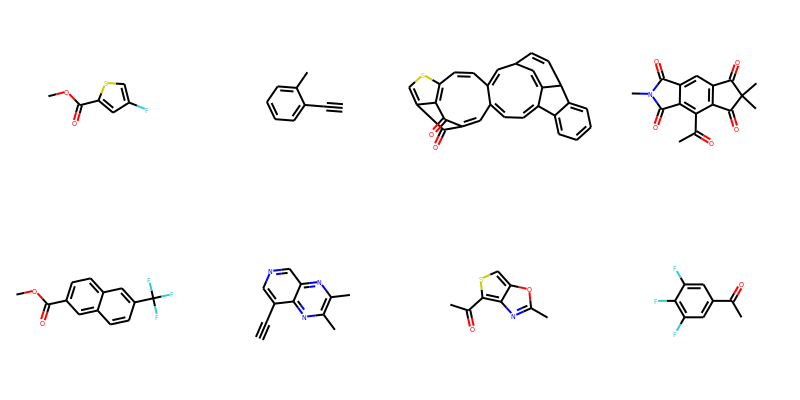

In [5]:
Chem.Draw.MolsToGridImage(generated_mols['polymer_117motif'], molsPerRow=4, subImgSize=(200,200))

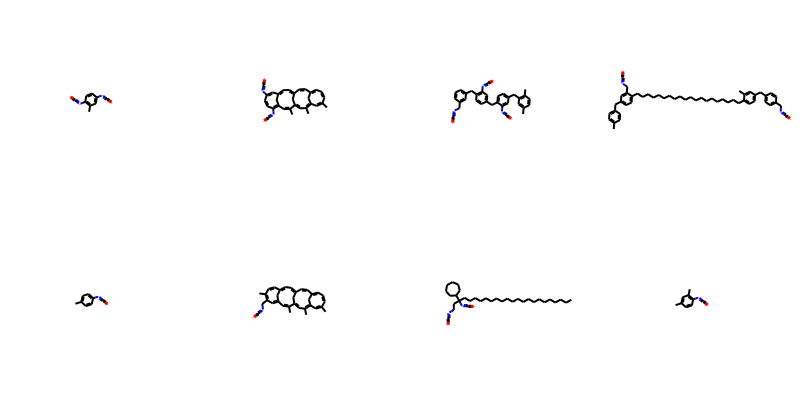

In [6]:
Chem.Draw.MolsToGridImage(generated_mols['iso'], molsPerRow=4, subImgSize=(200,200))

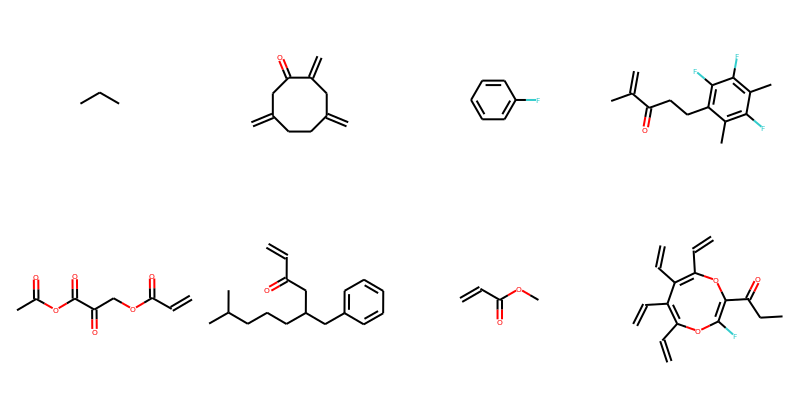

In [7]:
Chem.Draw.MolsToGridImage(generated_mols['acrylates'], molsPerRow=4, subImgSize=(200,200))

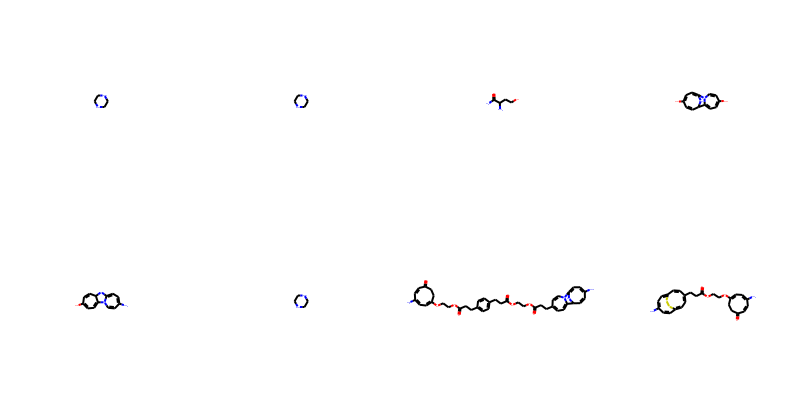

In [8]:
Chem.Draw.MolsToGridImage(generated_mols['chain_extender'], molsPerRow=4, subImgSize=(200,200))